Este proyecto consiste en el desarrollo de una red neuronal convolucional (CNN) para la clasificación de imágenes de los primeros 150 Pokémon.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random, datetime, os, shutil, math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


In [12]:
# WARNING: this code is used to import dataset from kaggle
import os
kaggle_dir = '/content/gdrive/My Drive/Kaggle'

if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

os.environ['KAGGLE_CONFIG_DIR'] = kaggle_dir
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [13]:
#WARNING: this code is used while importing dataset from kaggle
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [14]:
#WARNING: this code is used while importing dataset from kaggle
#changing the working directory
!kaggle datasets download -d lantian773030/pokemonclassification

Dataset URL: https://www.kaggle.com/datasets/lantian773030/pokemonclassification
License(s): copyright-authors
 99% 415M/417M [00:26<00:00, 19.3MB/s]
100% 417M/417M [00:26<00:00, 16.5MB/s]


In [15]:
#WARNING: this code is used while importing dataset from kaggle
#unzipping the zip files and deleting the zip files
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: PokemonData/Golbat/78bb8cd2828f40158fc0dcd4c0366a57.jpg  
  inflating: PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: PokemonData/Golbat/9a4c793b9b0042a99ebd540897f9f898.jpg  
  inflating: PokemonData/Golbat/a35b4e8e603c485cb197520af30e1208.jpg  
  inflating: PokemonData/Golbat/a45a14a67a7348bba57c06467bb73cde.jpg  
  inflating: PokemonData/Golbat/acc2b44eada74a25a64c041b2e80c453.jpg  
  inflating: PokemonData/Golbat/af30483e382240d38890dec39e083b08.jpg  
  inflating: PokemonData/G

In [16]:
#creating test dataset from the train dataset
dir_path='/content/gdrive/MyDrive/Kaggle/PokemonData'
classes = os.listdir(dir_path)

In [17]:
#for creating a train folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train")

0

In [18]:
#moving all folders from root folder to train folder
os.system("mv /content/gdrive/MyDrive/Kaggle/PokemonData/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/")

256

In [19]:
# Creating the test folder
os.system("mkdir /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test")


0

In [20]:
#copying all train data to test folder, in order to get same folder structure
os.system("cp -r /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train/* /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/")

0

In [21]:
#deleting images from sub directories of test folder
os.system("find /content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test/ -name '*.*' -type f -delete")

0

In [22]:
train_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_train'
test_dir='/content/gdrive/MyDrive/Kaggle/PokemonData/Pokemon_test'

In [23]:
# Copying 15 random images from train folders to test folders
def prep_test_data(pokemon, train_dir, test_dir):
  pop = os.listdir(train_dir+'/'+pokemon)
  test_data=random.sample(pop, 15)
  print(test_data)
  for f in test_data:
    shutil.copy(train_dir+'/'+pokemon+'/'+f, test_dir+'/'+pokemon+'/')

In [24]:
#performing samething for each folder in train folder
for poke in os.listdir(train_dir):
  prep_test_data(poke, train_dir, test_dir)

['b065da5f186d4f9db497012350b31a9f.jpg', 'aabb27dd7e1c4508880bd8cc1141c340.jpg', 'e3da65f45d7841c8a14d591a24c0e2bc.jpg', '32240b108a8140f8b31c495166fc453c.jpg', '86c823fe351549c7818efd6ca718556e.jpg', '7a300d6f799c48d1943cafaa5ab24e27.jpg', '0282b2f3a22745f1a436054ea15a0ae5.jpg', 'bd0873f54401446cacfafdac70f82cd3.jpg', 'e106e14eb8b54eff8bea6f765ea9d20c.jpg', '2eb2a528f9a247358452b3c740df69a0.jpg', '34532bb006714727ade4075f0a72b92d.jpg', 'c241146097b44c2e98ee7e473f90074a.jpg', 'c1c82c89958a4839a074910de72df05a.jpg', '48412baa8527483d8e8ddb8555d2eeff.jpg', 'c9ab368481e446d685b1c1fdb42487df.jpg']
['7fb69a33c0ca4c458812233bb4084b01.jpg', '41e07cd07e9a4d25b9ad5a9ca08f3b5e.jpg', 'bf5489f37c6f4dd688e59254d3bddcab.jpg', '029d0c659dc448f49993648b024e615c.jpg', '0f5ec128d07341989cb8786fec08c885.jpg', 'bb6be0f790654421a4456b1b9242e0a1.jpg', '91a6d66ed71e45c4a7a5a7917ab44666.jpg', '8e1000fe38a640c2b74abc74e93eb049.jpg', '523b396d18584c35a45823b6a145eff6.jpg', 'a1eb1fcdf2ea490aa3dc6b49a8c88fd5.jpg'

In [25]:
target_classes = os.listdir(train_dir)
num_classes = len(target_classes)
print('Number of target classes:', num_classes)
print(list(enumerate(target_classes)))

Number of target classes: 150
[(0, 'Abra'), (1, 'Aerodactyl'), (2, 'Alakazam'), (3, 'Alolan Sandslash'), (4, 'Arbok'), (5, 'Arcanine'), (6, 'Articuno'), (7, 'Beedrill'), (8, 'Bellsprout'), (9, 'Blastoise'), (10, 'Bulbasaur'), (11, 'Butterfree'), (12, 'Caterpie'), (13, 'Chansey'), (14, 'Charizard'), (15, 'Charmander'), (16, 'Charmeleon'), (17, 'Clefable'), (18, 'Clefairy'), (19, 'Cloyster'), (20, 'Cubone'), (21, 'Dewgong'), (22, 'Diglett'), (23, 'Ditto'), (24, 'Dodrio'), (25, 'Doduo'), (26, 'Dragonair'), (27, 'Dragonite'), (28, 'Dratini'), (29, 'Drowzee'), (30, 'Dugtrio'), (31, 'Eevee'), (32, 'Ekans'), (33, 'Electabuzz'), (34, 'Electrode'), (35, 'Exeggcute'), (36, 'Exeggutor'), (37, 'Farfetchd'), (38, 'Fearow'), (39, 'Flareon'), (40, 'Gastly'), (41, 'Gengar'), (42, 'Geodude'), (43, 'Gloom'), (44, 'Golbat'), (45, 'Goldeen'), (46, 'Golduck'), (47, 'Golem'), (48, 'Graveler'), (49, 'Grimer'), (50, 'Growlithe'), (51, 'Gyarados'), (52, 'Haunter'), (53, 'Hitmonchan'), (54, 'Hitmonlee'), (55, '

In [26]:
training_set_distribution = [len(os.listdir(os.path.join(train_dir, dir))) for dir in os.listdir(train_dir)]
testing_set_distribution = [len(os.listdir(os.path.join(test_dir, dir))) for dir in os.listdir(test_dir)]

In [27]:
def show_pokemon(pokemon):
  num = len(pokemon)
  if num == 0:
    return None
  rows = int(math.sqrt(num))
  cols = (num+1)//rows
  f, axs = plt.subplots(rows, cols)
  fig = 0
  for b in pokemon:
    img = image.load_img(b)
    row = fig // cols
    col = fig % cols
    axs[row, col].imshow(img)
    fig += 1
  plt.show()

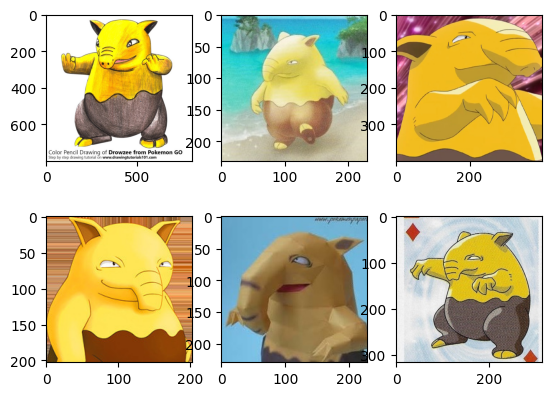

In [28]:
dir_name = os.path.join(train_dir,"Drowzee")
all_images = [os.path.join(dir_name, fname) for fname in os.listdir(dir_name)]
show_pokemon(all_images[:6])

In [29]:
image_size = (64, 64, 3)
datagen=ImageDataGenerator(rescale = 1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           )

In [30]:
training_set=datagen.flow_from_directory(train_dir,
                                         target_size=image_size[:2],
                                         batch_size=32,
                                         class_mode='categorical',
                                         color_mode='rgb'
                                         )

Found 6820 images belonging to 150 classes.


In [31]:
validation_set=datagen.flow_from_directory(test_dir,
                                           target_size=image_size[:2],
                                           batch_size=32,
                                           class_mode='categorical',
                                           color_mode='rgb'
                                           )

Found 2244 images belonging to 150 classes.


In [32]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential

In [33]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
filepath = "model.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 150)               4

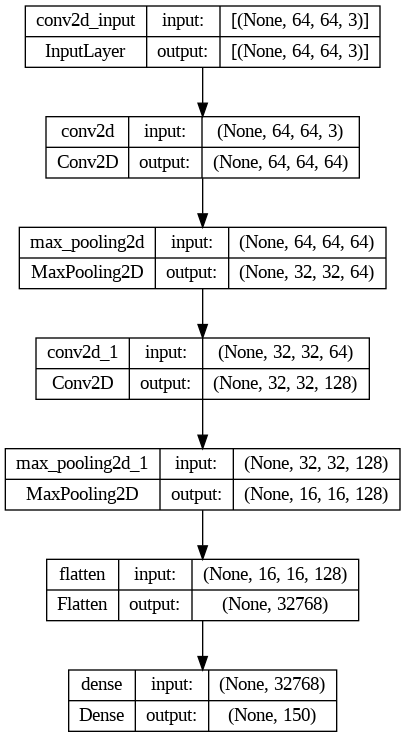

In [34]:
#defining model
def cnn(image_size, num_classes):
    classifier = Sequential()
    classifier.add(Conv2D(64, (5, 5), input_shape=image_size, activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(num_classes, activation = 'softmax'))
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return classifier

neuralnetwork_cnn = cnn(image_size, num_classes)
neuralnetwork_cnn.summary()

In [35]:
history = neuralnetwork_cnn.fit_generator(
    generator=training_set, validation_data=validation_set,
    callbacks=[es, ckpt, rlp], epochs = 20,
)

<ipython-input-35-6846e64249ab>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = neuralnetwork_cnn.fit_generator(


Epoch 1/20
214/214 [==============================] - ETA: 0s - loss: 4.3025 - acc: 0.0985
Epoch 1: loss improved from inf to 4.30253, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


214/214 [==============================] - 108s 485ms/step - loss: 4.3025 - acc: 0.0985 - val_loss: 3.0071 - val_acc: 0.2901 - lr: 0.0010
Epoch 2/20
214/214 [==============================] - ETA: 0s - loss: 2.5584 - acc: 0.3890
Epoch 2: loss improved from 4.30253 to 2.55844, saving model to model.h5
214/214 [==============================] - 83s 390ms/step - loss: 2.5584 - acc: 0.3890 - val_loss: 2.0153 - val_acc: 0.5348 - lr: 0.0010
Epoch 3/20
214/214 [==============================] - ETA: 0s - loss: 1.8343 - acc: 0.5487
Epoch 3: loss improved from 2.55844 to 1.83433, saving model to model.h5
214/214 [==============================] - 84s 392ms/step - loss: 1.8343 - acc: 0.5487 - val_loss: 1.4579 - val_acc: 0.6399 - lr: 0.0010
Epoch 4/20
214/214 [==============================] - ETA: 0s - loss: 1.4244 - acc: 0.6346
Epoch 4: loss improved from 1.83433 to 1.42437, saving model to model.h5
214/214 [==============================] - 82s 386ms/step - loss: 1.4244 - acc: 0.6346 - val_los

<Axes: >

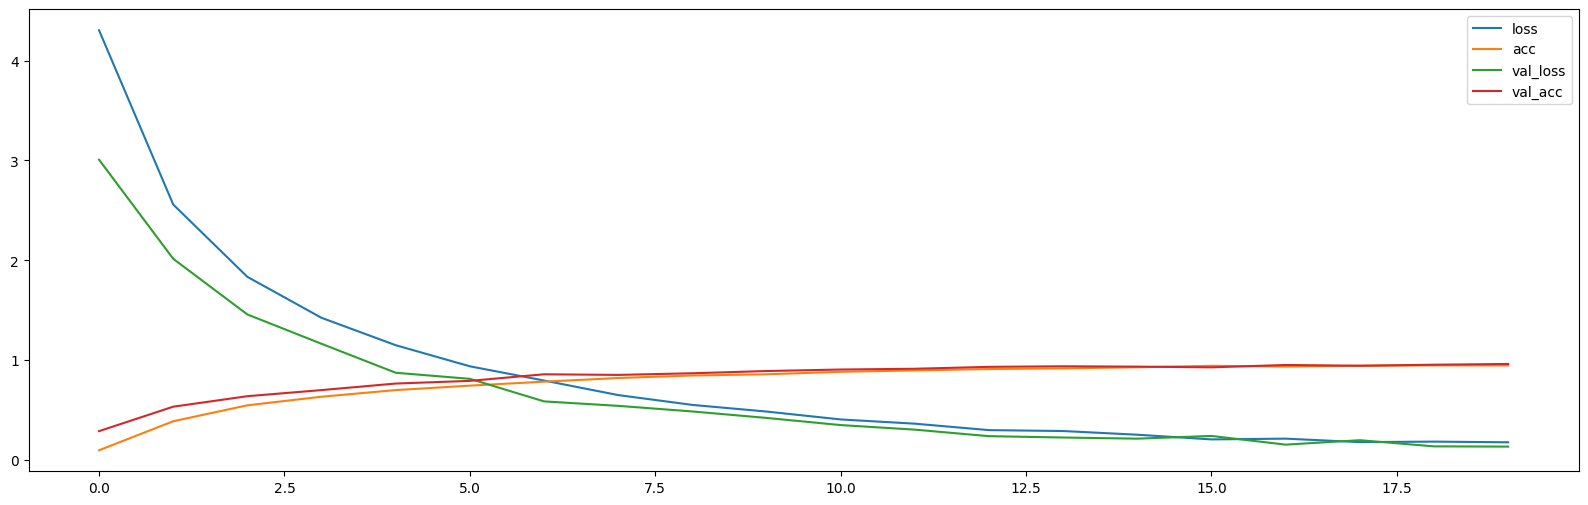

In [44]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.DataFrame(history.history).iloc[:, :-1].plot(ax=ax)

In [43]:
# prompt: test the model with a test image from a placeholder path

# aqui puedes definir test_image_path como la ruta a una iamgen de un pokemon que quieras que el modelo analice.

from keras.preprocessing import image
import numpy as np

# Placeholder path for the test image
test_image_path = "/content/gdrive/MyDrive/Kaggle/PokemonData/30a.png"

# Load the test image
test_image = image.load_img(test_image_path, target_size=(64, 64))

# Convert the image to a numpy array
test_image = image.img_to_array(test_image)

# Reshape the image to match the model input shape
test_image = np.expand_dims(test_image, axis=0)

# Make predictions using the trained model
predictions = neuralnetwork_cnn.predict(test_image)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)

# Get the class name using the index
predicted_class_name = target_classes[predicted_class_index]

# Print the predicted class label
print("Predicted class:", predicted_class_name)


1/1 [==============================] - 0s 20ms/step
Predicted class: Nidorina
